In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    num1: int
    operation: str
    num2: int
    final: int

In [3]:
def adder(state:AgentState) -> AgentState:
    state["final"] = state["num1"] + state["num2"]
    return state

def subtractor(state:AgentState) -> AgentState:
    state["final"] = state["num1"] - state["num2"]
    return state

In [4]:
def decide_next_node(state:AgentState) -> AgentState:
    """This node will select the next node of the graph"""

    if state["operation"] == "+":
        return "addition_operation" # -> name of the edge
    
    elif state["operation"] == "-":
        return "subtraction_operation" 

In [5]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("sub_node", subtractor)

# graph.add_node("router", decide_next_node) -> this won't work as the function returns an edge
graph.add_node("router", lambda state:state) # -> the state doesn't change, we are just comparing things

In [6]:
graph.add_edge(START, "router") # -> connect router first (not adder and subtractor)
graph.add_conditional_edges(
    "router", # source
    decide_next_node,
    
    # dict of -> edge:node
    {
        "addition_operation": "add_node",
        "subtraction_operation": "sub_node"
    }
)

# connect the nodes to the end
graph.add_edge("add_node", END)
graph.add_edge("sub_node", END)

app = graph.compile()

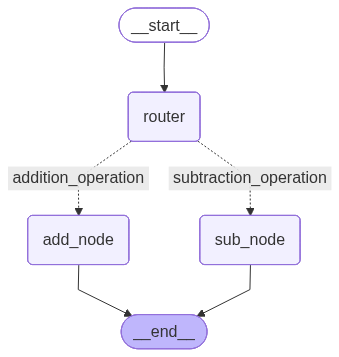

In [7]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [8]:
initial_state_1 = AgentState(num1 = 10,
                            operation="-", 
                            num2 = 5)
result = app.invoke(initial_state_1)

result

{'num1': 10, 'operation': '-', 'num2': 5, 'final': 5}

In [9]:
result["final"]

5

In [10]:
result = app.invoke({"num1": 10, 
                    "operation": "-", 
                    "num2": 5})
print(result)

{'num1': 10, 'operation': '-', 'num2': 5, 'final': 5}
